In [1]:
!pip install wordcloud
!pip install gensim
!pip install pywaffle
!pip install keras
!pip install tensorflow

  Stored in directory: C:\Users\Sophie\AppData\Local\pip\Cache\wheels\18\88\7c\f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: Cython 0.29.12
    Uninstalling Cython-0.29.12:
      Successfully uninstalled Cython-0.29.12
  Stored in directory: C:\Users\Sophie\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0


In [36]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [37]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))
#stopwords

### On fait une fonction qui crée un csv avec le texte

In [57]:
import csv
import io

In [82]:
def creation_csv(nom_livre,numero_livre):
    chemin = r"C:\Users\Sophie\Harry-Python\Data\Book " + numero_livre + " - " + nom_livre + ".txt"
    sortie = r"C:\Users\Sophie\Harry-Python\Data\book" + numero_livre + ".csv"
    with io.open(chemin,"r",encoding="utf-8") as infile, open(sortie, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        #lines = lines.replace('|',' ')
        writer = csv.writer(outfile)
        writer.writerows(lines)

In [83]:
creation_csv("The Philosophers Stone","1")
creation_csv("The Chamber of Secrets","2")
creation_csv("The Prisoner of Azkaban","3")
creation_csv("The Goblet of Fire","4")
creation_csv("The Order of the Phoenix","5")
creation_csv("The Half Blood Prince","6")
creation_csv("The Deathly Hallows","7")

UnicodeEncodeError: 'charmap' codec can't encode character '\u25a0' in position 32: character maps to <undefined>

In [48]:
data = pd.read_csv(r"C:\Users\Sophie\Harry-Python\Data\book1.csv", sep='delimiter', header=None)
data.head(100)

C:\Users\Sophie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


EmptyDataError: No columns to parse from file

In [15]:
# Combine all training text into one large string
all_text = ' '.join([text for text in data[0]])
print('Number of words in all_text:', len(all_text))

Number of words in all_text: 448356


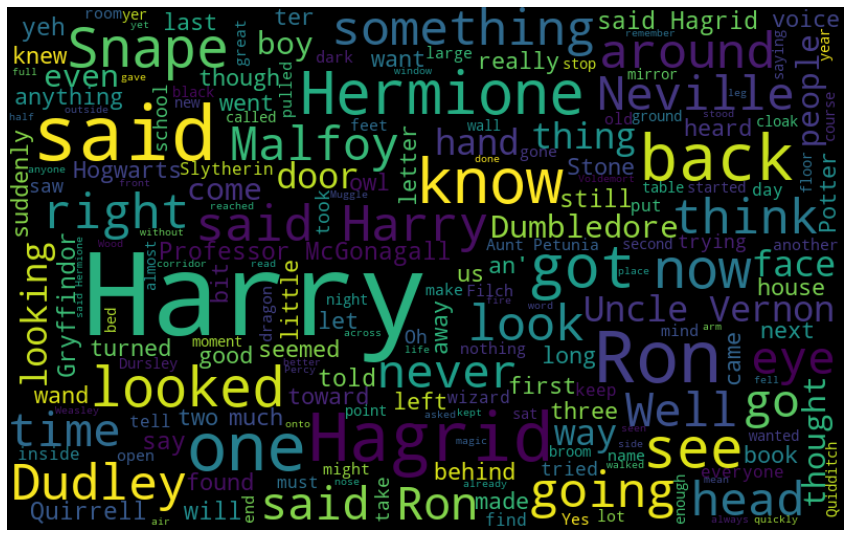

In [16]:
# Word cloud for entire training dataset
# default width=400, height=200

wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

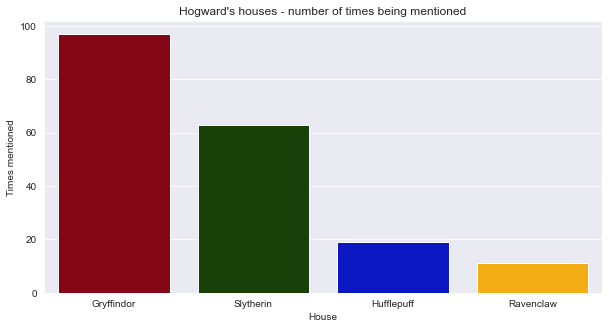

In [21]:
Slytherin = all_text.count("Slytherin")
Gryffindor = all_text.count("Gryffindor")
Hufflepuff = all_text.count("Hufflepuff")
Ravenclaw = all_text.count("Ravenclaw")
house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
df_house= pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
colors = ["crimson", "forrest green", "true blue", "amber"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Hogward's houses - number of times being mentioned")

In [27]:
#tokenisation pour avoir un texte "clean"
#nltk.download('punkt')
text_list = nltk.tokenize.word_tokenize(all_text)
text_list = [x.lower() for x in text_list]

# ensuite, on enlève les stopswords qui sont les mots comme if, then, the, and ... ainsi que la ponctuation

text_clean = [w.lower() for w in text_list if w not in stopwords and w.isalpha()]
text_clean = ' '.join(text.lower() for text in text_clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adxva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


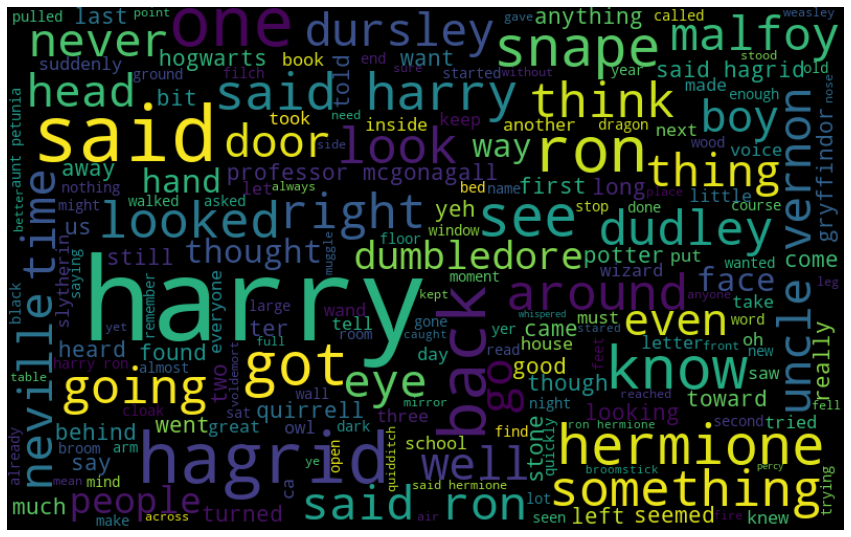

In [30]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(text_clean)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

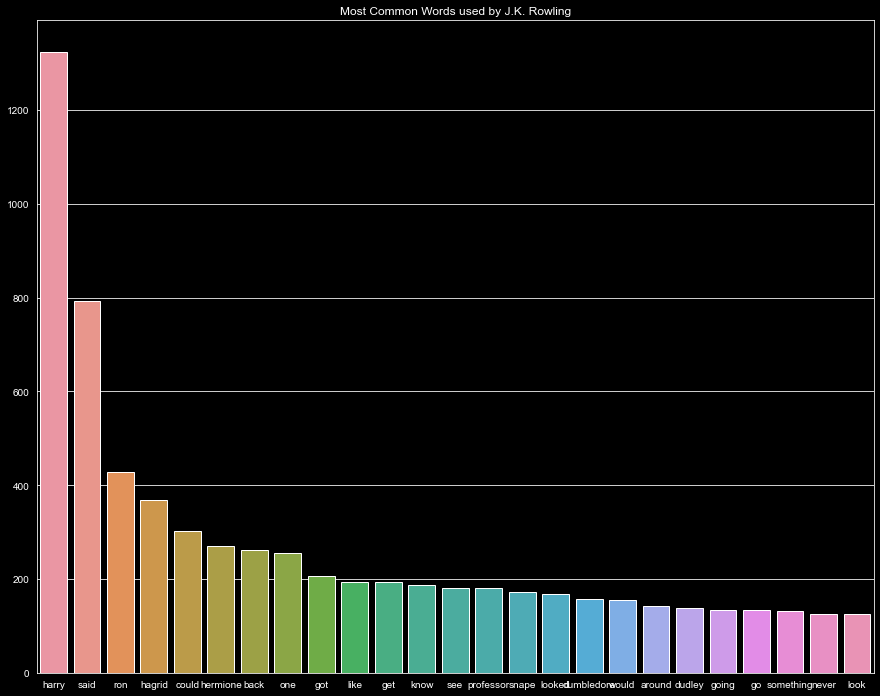

In [34]:
text_clean_list = text_clean.split()
text_counts = Counter(text_clean_list)
text_common_words = [word[0] for word in text_counts.most_common(25)]
text_common_counts = [word[1] for word in text_counts.most_common(25)]

plt.style.use('dark_background')
plt.figure(figsize=(15, 12))

sns.barplot(x=text_common_words, y=text_common_counts)
plt.title('Most Common Words used by J.K. Rowling');

In [ ]:
tralalilala